Note: All the visualizations in this script are tailored for 2-dimensional functions to clearly demonstrate the behavior and progression of the algorithm, In multivariate optimization methods.

# Bracketing to find an interval of uncertainty

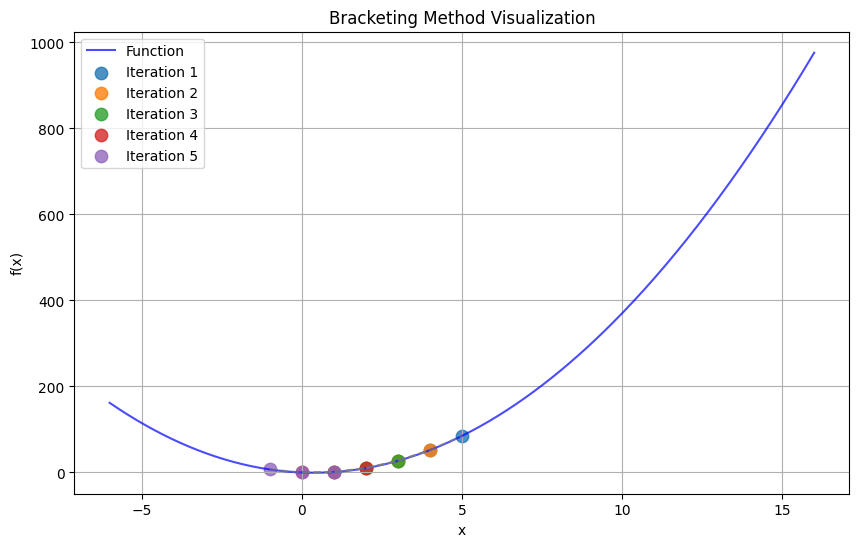

The minimum is bracketed between [-1, 1]


In [17]:
import numpy as np
import matplotlib.pyplot as plt

def bracket(func, x1, x2, step=1, max_iter=1000, visualize=False):
    # Ensure x1 < x2
    if x1 > x2:
        x1, x2 = x2, x1

    f1 = func(x1)
    f2 = func(x2)
    
    # Calculate the third point x3
    x3 = x2 + step
    f3 = func(x3)
    
    iteration = 0
    
    if visualize:
        plt.figure(figsize=(10, 6))
        x_vals = np.linspace(x1 - 10 * step, x3 + 10 * step, 400)
        plt.plot(x_vals, func(x_vals), label="Function", color="blue", alpha=0.7)
    
    # If we already have the bracket [x1, x3] such that f(x1) > f(x2) < f(x3)
    if f1 > f2 < f3:
        return x1, x3
        
    # Start iteration to find the bracket
    while (f2 >= f1 or f2 >= f3) and iteration < max_iter:    
        if f1 < f2:
            x3 = x2
            x2 = x1
            f3 = f2
            f2 = f1
            x1 = x1 - step
            f1 = func(x1)
        else:
            x1 = x2
            x2 = x3
            f1 = f2
            f2 = f3
            x3 = x3 + step
            f3 = func(x3)

        iteration += 1

        if visualize:
            # Highlight current points at each iteration
            plt.scatter([x1, x2, x3], [func(x1), func(x2), func(x3)], 
                        label=f"Iteration {iteration}", s=80, marker='o', alpha=0.8)
            plt.plot([x1, x2, x3], [func(x1), func(x2), func(x3)], '--', color='gray', alpha=0.6)

    if iteration == max_iter:
        print("Warning: Maximum iterations reached.")
    
    if visualize:
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.title("Bracketing Method Visualization")
        plt.grid(True)
        plt.legend()
        plt.show()
        
    return x1, x3
    
# Example usage:
def complex_func(x):
    return (2 * x)**2 - 3 * x

# Initial guesses
x1 = 4
x2 = 5

# Bracket the minimum with visualization
a, b = bracket(complex_func, x1, x2, visualize=True)
print(f"The minimum is bracketed between [{a}, {b}]")


# Equal interval search method

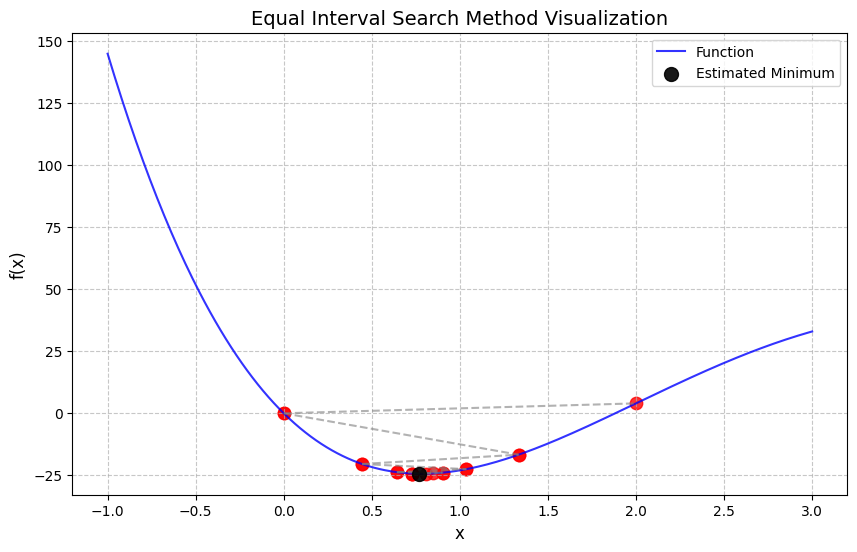

The minimum is at x = 0.7687852461515015 with f(x) = -24.365064734884577 after 8 iterations


In [21]:
import numpy as np
import matplotlib.pyplot as plt

def equal_interval_search(func, a, b, epsilon=1e-1, visualize=False):

    # Visualization
    if visualize:
        plt.figure(figsize=(10, 6))
        x_vals = np.linspace(a - 1, b + 1, 400)  # Adjusted plot range slightly
        plt.plot(x_vals, func(x_vals), label="Function", color="blue", alpha=0.8)
    
    intervals = []
    iterations = 0

    while (b - a) >= epsilon:
        a1 = a + (b - a) / 3
        b1 = b - (b - a) / 3
        intervals.append((a, b))

        if func(a1) < func(b1):
            b = b1
        else:
            a = a1

        iterations += 1

    x_star = (a + b) / 2
    # Final interval
    intervals.append((a, b))

    if visualize:
        for interval in intervals:
            # Plot the intervals with dashed lines for clarity
            plt.plot([interval[0], interval[1]], [func(interval[0]), func(interval[1])], 
                     color="grey", linestyle='--', alpha=0.6)
            # Mark the points at the interval boundaries
            plt.scatter([interval[0], interval[1]], [func(interval[0]), func(interval[1])], 
                        color="red", s=80, alpha=0.8)

        # Highlight the final interval and estimated minimum
        plt.scatter([x_star], [func(x_star)], color="black", s=100, zorder=5, 
                    label="Estimated Minimum", alpha=0.9)
        
        plt.xlabel("x", fontsize=12)
        plt.ylabel("f(x)", fontsize=12)
        plt.title("Equal Interval Search Method Visualization", fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend()
        plt.show()

    return x_star, func(x_star), iterations

# Example usage:
def complex_func(x):
    return x**4 - 14*(x**3) + 60*(x**2) - 70*x  # Example function with a minimum at x = 2

# Initial guesses
a0 = 0
b0 = 2

# Find the minimum using Equal Interval Search with visualization
x_min, f_min, iterations = equal_interval_search(complex_func, a0, b0, visualize=True)
print(f"The minimum is at x = {x_min} with f(x) = {f_min} after {iterations} iterations")


# Golden section search

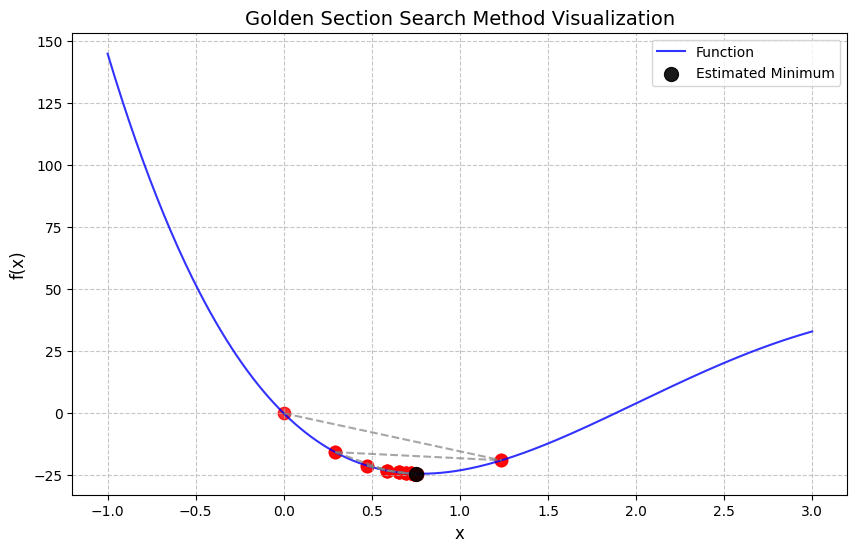

The minimum is at x = 0.7507764050037854 with f(x) = -24.341328825441938 after 16 iterations


In [23]:
import numpy as np
import matplotlib.pyplot as plt

def golden_section_search(func, a, b, epsilon=1e-2, visualize=False):
    # Golden ratio
    ϕ = (3 - np.sqrt(5)) / 2
    a1 = a + ϕ * (b - a)
    b1 = a + (1 - ϕ) * (b - a)
    
    iterations = 0
    
    # Visualization
    if visualize:
        plt.figure(figsize=(10, 6))
        x_vals = np.linspace(a0 - 1, b0 + 1, 400)
        plt.plot(x_vals, func(x_vals), label="Function", color="blue", alpha=0.8)
    
    while (b - a) >= epsilon:
        if func(a1) < func(b1):
            b = b1
            b1 = a1
            a1 = a + ϕ * (b1 - a)
        else:
            a = a1
            a1 = b1
            b1 = a + (1 - ϕ) * (b1 - a)
        
        # Improved visualization during iterations
        if visualize:
            plt.plot([a, b], [func(a), func(b)], color="grey", linestyle='--', alpha=0.7)
            plt.scatter([a, b], [func(a), func(b)], color="red", s=80, alpha=0.8)
        
        iterations += 1
    
    x_star = (a + b) / 2
    
    if visualize:
        # Highlight the final estimated minimum point
        plt.scatter([x_star], [func(x_star)], color="black", s=100, zorder=5, label="Estimated Minimum", alpha=0.9)
        
        plt.xlabel("x", fontsize=12)
        plt.ylabel("f(x)", fontsize=12)
        plt.title("Golden Section Search Method Visualization", fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend()
        plt.show()
    
    return x_star, func(x_star), iterations

# Example usage:
def complex_func(x):
    return x**4 - 14*(x**3) + 60*(x**2) - 70*x  # Example function with a minimum at x = 2

# Initial guesses
a0 = 0
b0 = 2

# Find the minimum using Golden Section Search with visualization
x_min, f_min, iterations = golden_section_search(complex_func, a0, b0, visualize=True)
print(f"The minimum is at x = {x_min} with f(x) = {f_min} after {iterations} iterations")


# Fibonnaci search method


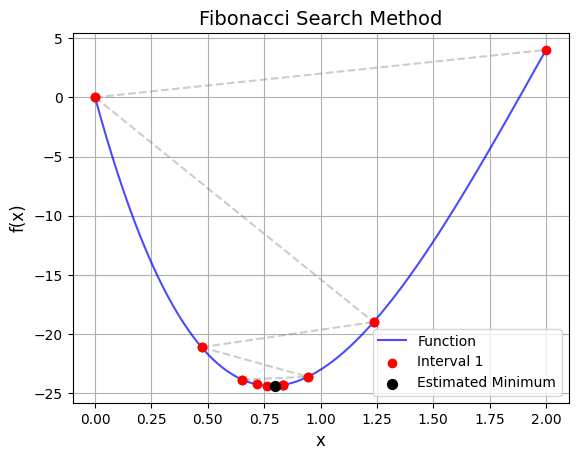


Estimated minimum at x = 0.7980 with f(x) = -24.3606


In [16]:
import numpy as np
import matplotlib.pyplot as plt

def fibonacci_search(func, a, b, final_range, ϵ=0.1, visualize=False):
    initial_range = b - a
    x = (1 + 2 * ϵ) * (initial_range / final_range)
    
    # Generate Fibonacci numbers until the required limit
    fib = [1, 1]
    while fib[-1] < x:
        fib.append(fib[-1] + fib[-2])
    
    N_plus_1 = len(fib) - 1
    
    # Initial points a1 and b1
    ϕ = 1 - (fib[N_plus_1 - 1] / fib[N_plus_1])
    a1 = a + ϕ * (b - a)
    b1 = a + (1 - ϕ) * (b - a)
    
    # List to store intervals for visualization
    intervals = [(a, b)]

    # Iteratively reduce the interval
    for i in range(N_plus_1, 1, -1):
        if np.round(func(a1), 2) < np.round(func(b1), 2):
            b = b1
            b1 = a1
            a1 = a + ϕ * (b - a)
        else:
            a = a1
            a1 = b1
            b1 = a + (1 - ϕ) * (b - a)
        
        # Recalculate the Fibonacci ratio for the next iteration
        ϕ = 1 - (fib[i - 1] / fib[i])

        # Store the interval at each step
        intervals.append((a, b))

    # Final estimate of minimum
    x_min = (a + b) / 2

    if visualize:
        # Plotting the function and intervals
        x_vals = np.linspace(intervals[0][0], intervals[0][1], 400)
        plt.plot(x_vals, func(x_vals), label="Function", color="blue", alpha=0.7)
        
        # Plot each interval
        for idx, (a, b) in enumerate(intervals):
            plt.scatter([a, b], [func(a), func(b)], color='red', zorder=5, label=f"Interval {idx+1}" if idx == 0 else "")
            plt.plot([a, b], [func(a), func(b)], color='gray', alpha=0.4, linestyle='--')

        # Highlight the minimum point
        plt.scatter(x_min, func(x_min), color='black', s=50, zorder=10, label="Estimated Minimum")

        # Title and labels
        plt.title("Fibonacci Search Method", fontsize=14)
        plt.xlabel("x", fontsize=12)
        plt.ylabel("f(x)", fontsize=12)
        plt.grid(True)
        plt.legend()

        # Show the plot
        plt.show()
    
    return x_min, func(x_min)

# Example function with multiple extrema
def example_function(x):
    return x**4 - 14*(x**3) + 60*(x**2) - 70*x

a0 = 0
b0 = 2
final_range = 0.1

# Call with visualization
x_min, f_min = fibonacci_search(example_function, a0, b0, final_range, visualize=True)
print(f"\nEstimated minimum at x = {x_min:.4f} with f(x) = {f_min:.4f}")


# Quadratic interpolation

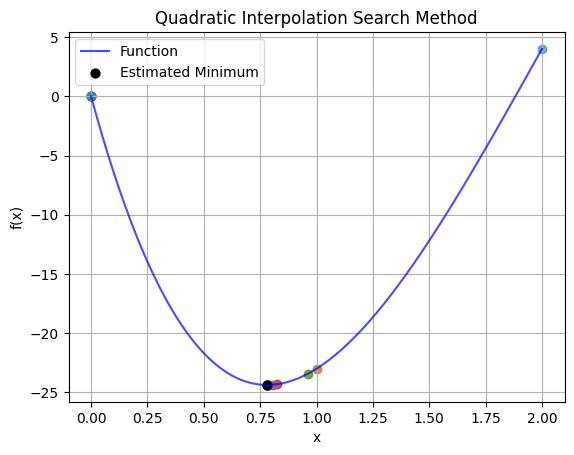

Estimated minimum at x = 0.7808840039002343 with f(x) = -24.36960156735496


In [34]:
import numpy as np
import matplotlib.pyplot as plt

def quadratic_interpolation_search(func, a, c, tol=1e-5, max_iter=100,visualize=False):
    # Initialize the midpoint b
    b = a + (c - a) / 2
    
    iteration = 0
    intervals = [(a, b, c)]  # Store intervals for visualization
    
    while abs(c - a) >= tol and iteration < max_iter:
        # Evaluate function at a, b, and c
        fa, fb, fc = func(a), func(b), func(c)
        
        # Apply the quadratic interpolation formula to find the minimum of the parabola
        numerator = fa * (c**2 - b**2) + fc * (b**2 - a**2) + fb * (a**2 - c**2)
        denominator = 2 * (fa * (c - b) + fc * (b - a) + fb * (a - c))
        
        if denominator == 0:
            print("Denominator became zero, terminating search.")
            break
        
        x_min = numerator / denominator
        f_min = func(x_min)
        
        # Update the interval based on the new point
        if x_min < b:
            if f_min < fb:
                c = b
                b = x_min
            else:
                a = x_min
        else:
            if f_min < fb:
                a = b
                b = x_min
            else:
                c = x_min
        
        intervals.append((a, b, c))  # Store intervals for visualization
        iteration += 1

    # Visualization
    if visualize:
        
        x_vals = np.linspace(min(intervals[0]), max(intervals[0]), 400)
        plt.plot(x_vals, func(x_vals), label="Function", color="blue", alpha=0.7)
        
        # Plot the intervals at each step
        for idx, (a, b, c) in enumerate(intervals):
            plt.scatter([a, b, c], [func(a), func(b), func(c)], alpha=0.6)
            #plt.scatter([a, b, c], [func(a), func(b), func(c)], label=f"Iteration {idx+1}", alpha=0.6)
        # Highlight the estimated minimum
        plt.scatter([x_min], [f_min], color="black", s = 40,label="Estimated Minimum")
        plt.title("Quadratic Interpolation Search Method")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.grid(True)
        plt.legend()
        plt.show()
    
    return x_min, f_min

# Example function with a minimum
def example_function(x):
    return x**4 - (14 * x**3) + (60 * x**2) - 70 * x

# Initial points for the quadratic interpolation search
a = 0
c = 2

x_min, f_min = quadratic_interpolation_search(example_function, a, c,visualize=True)
print(f"Estimated minimum at x = {x_min} with f(x) = {f_min}")


# Random Walk

Estimated minimum at X = [-0.99017254  1.47691517] with f(X) = -1.2497276632936978


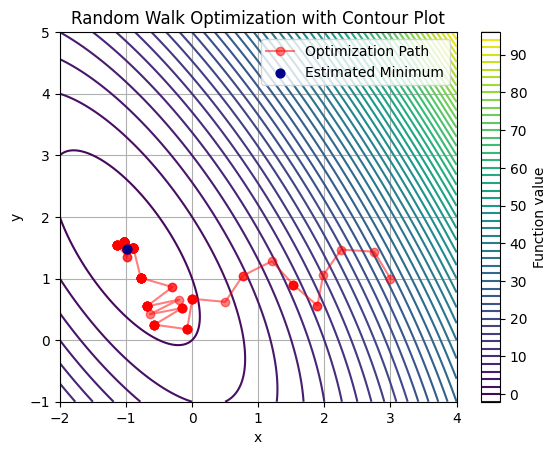

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def random_walk_optimization(func, X1, λ=0.5, ε=1e-1, N=100):

    n = len(X1)  # Dimensionality of the problem
    f1 = func(X1)  # Initial function value
    iteration = 1
    path = [X1]  # Store path for visualization

    while λ > ε and iteration <= N:
        # Step 4: Generate a random unit vector u
        while True:
            r = np.random.uniform(-1, 1, n)  # Random numbers in [-1, 1]
            R = np.linalg.norm(r)  # Length of the vector
            if R <= 1:
                u = r / R  # Unbiased random unit vector
                break

        # Step 5: Compute new point and function value
        X_new = X1 + λ * u
        f_new = func(X_new)

        # Step 6: Compare function values
        if f_new < f1:
            X1 = X_new
            f1 = f_new
        else:
            iteration += 1

        path.append(X1)  # Store current point for visualization

        # Step 7: Check if maximum iterations reached
        if iteration > N:
            λ = λ / 2  # Reduce step length
            iteration = 1  # Reset iteration counter

    # Step 9: Return the estimated minimum
    return X1, f1, path

# Example function (to minimize)
def example_function(X):
    # Example: A simple quadratic function f(x, y) = (x-1)^2 + (y-2)^2
    return (X[0] - X[1] + 2*X[0]**2 + 2*X[1]*X[0]+ X[1]**2)

# Visualization and plotting
def plot_contour(func, path):
    x_vals = np.linspace(-2, 4, 400)
    y_vals = np.linspace(-1, 5, 400)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = func([X, Y])

    # Plot the contour
    plt.contour(X, Y, Z, levels=50, cmap='viridis')
    plt.colorbar(label='Function value')

    # Plot the optimization path
    path = np.array(path)
    plt.plot(path[:, 0], path[:, 1], 'ro-', label="Optimization Path",alpha= 0.5)
    plt.scatter(path[-1, 0], path[-1, 1], color='darkblue',s=40,zorder=20, label="Estimated Minimum")
    plt.title("Random Walk Optimization with Contour Plot")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

# Initial guess (X1)
initial_guess = np.array([3, 1])

# Call the random walk optimization function
X_opt, f_opt, path = random_walk_optimization(example_function, initial_guess)

print(f"Estimated minimum at X = {X_opt} with f(X) = {f_opt}")

# Plot contour and path 
plot_contour(example_function, path)


# Univariate Method


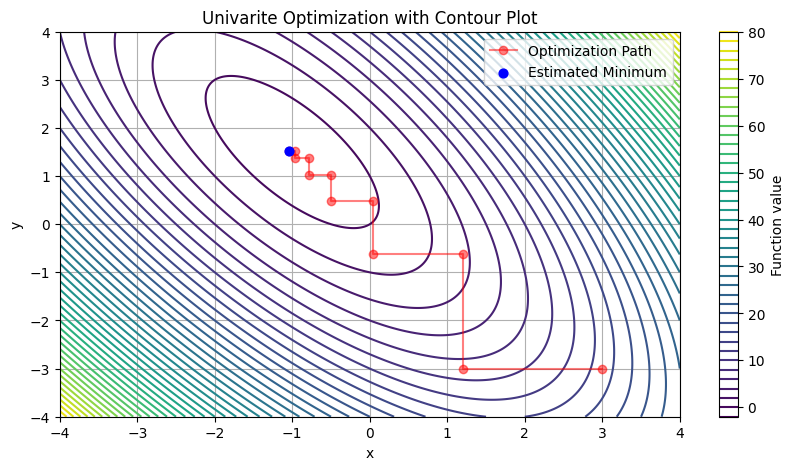

Optimal X: [-1.03723319  1.52777236]


In [45]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(X):
    # Define your objective function here
    return (X[0] - X[1] + 2*X[0]**2 + 2*X[1]*X[0]+ X[1]**2)  # Example: A simple quadratic function

def line_search(func, X, direction, ϵ=0.01):
    f = func(X)
    X_plus = X + ϵ * direction
    X_minus = X - ϵ * direction
    f_plus = func(X_plus)
    f_minus = func(X_minus)

    if f_plus < f:
        return direction  # Move in the positive direction
    elif f_minus < f:
        return -direction  # Move in the negative direction

def univariate_method(func, X, max_iterations=1000, epsilon=1e-5, visualize=False):
    n = len(X)
    directions = np.eye(n)  # Identity matrix for coordinate directions
    iteration = 0

    # For visualization purposes, store the X and function values
    history_X = [X.copy()]
    history_f = [func(X)]
    
    while iteration < max_iterations:
        improvement = False
        
        for direction in directions:
            dir = line_search(func,X, direction)
            
            if np.all(dir == 0):
                continue  # Skip if no improvement
            
            def evaluate_lambda(lambda_value):
                return func(X + lambda_value * dir)
            
             # Initial bracket values
            a0, b0 = bracket(evaluate_lambda, -1, 1,visualize = False)
            λ_star = fibonacci_search(evaluate_lambda, a0, b0, final_range=0.1, visualize=False)[0]
            
            # Update X
            X_new = X + λ_star * dir
            
            # Check for improvement
            if objective_function(X_new) < objective_function(X):
                X = X_new
                improvement = True

                # Store history for visualization
                history_X.append(X.copy())
                history_f.append(func(X))
        
        if not improvement or np.linalg.norm(λ_star * dir) < epsilon:
            break
        
        iteration += 1

    # Visualization part
    if visualize:
        if len(X) == 2:
            plt.figure(figsize=(10, 5))
            x_vals = np.linspace(-4, 4, 400)
            y_vals = np.linspace(-4, 4, 400)
            X_grid, Y_grid = np.meshgrid(x_vals, y_vals)
            
            # Evaluate the function over the meshgrid
            Z = func(np.array([X_grid, Y_grid]))
        
            # Plot the contour
            plt.contour(X_grid, Y_grid, Z, levels=50, cmap='viridis')
            plt.colorbar(label='Function value')
        
            # Plot the optimization path
            path = np.array(history_X)
           
            plt.plot(path[:, 0], path[:, 1], 'ro-', label="Optimization Path", alpha=0.5)
            plt.scatter(path[-1, 0], path[-1, 1], color='blue',s = 40,zorder=20, label="Estimated Minimum")
            
            plt.title("Univarite Optimization with Contour Plot")
            plt.xlabel("x")
            plt.ylabel("y")
            plt.legend()
            plt.grid(True)
            plt.show()
        else:
            print("Visualization is only implemented for 2D problems")

    return X

# Example usage
X_init = np.array([3, -3])
optimal_X = univariate_method(objective_function, X_init, visualize=True)
print("Optimal X:", optimal_X)


# Powell's method

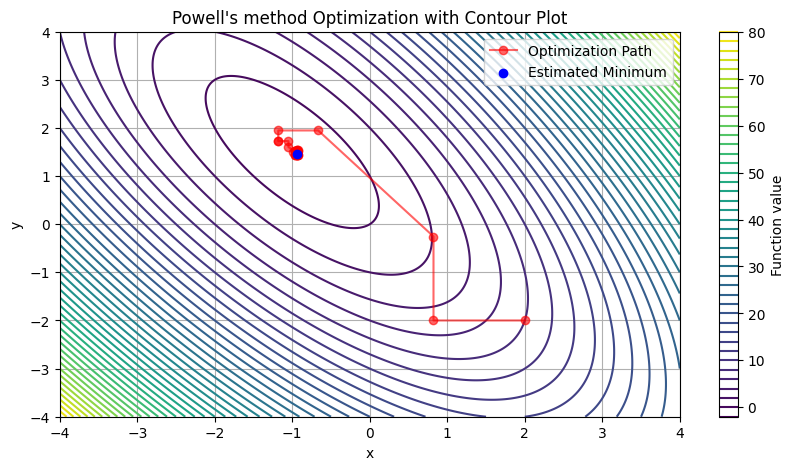

Optimal X: [-0.9364491   1.46294155]


In [76]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(X):
    # Example quadratic function (modify this as needed)
    return (X[0] - X[1] + 2 * X[0]**2 + 2 * X[1] * X[0] + X[1]**2)

def powells_method(func, X, max_iterations=1000, epsilon=1e-5, visualize=False):
    n = len(X)
    directions = np.eye(n)  # Identity matrix for coordinate directions
    iteration = 0

    # For visualization purposes, store the X and function values
    history_X = [X.copy()]
    history_f = [func(X)]
    
    while iteration < max_iterations:
        X_old = X.copy()
        
        for direction in directions:
            def evaluate_lambda(lambda_value):
                return func(X + lambda_value * direction)
            
            # Bracket search along the direction
            a0, b0 = bracket(evaluate_lambda, -1, 1, visualize=False)
            
            # Find the optimal step size (λ_star) using Fibonacci search
            λ_star = fibonacci_search(evaluate_lambda, a0, b0, final_range=0.01, visualize=False)[0]
            
            # Update X
            X = X + λ_star * direction
            
            # Store history for visualization
            history_X.append(X.copy())
            history_f.append(func(X))

        # Pattern move step (SP1 = difference between new and old position)
        SP1 = X - X_old
        
        def evaluate_lambda_pattern(lambda_value):
            return func(X + lambda_value * SP1)

        # Bracket and search for the optimal λ_star in the direction of the pattern move
        a0, b0 = bracket(evaluate_lambda_pattern, -1, 1, visualize=False)
        λ_star_pattern = fibonacci_search(evaluate_lambda_pattern, a0, b0, final_range=0.01, visualize=False)[0]

        # Update X again based on the pattern move
        X = X + λ_star_pattern * SP1
        
        # Store history for pattern moves
        history_X.append(X.copy())

        # Convergence check
        if np.linalg.norm(X - X_old) < epsilon:
            break
        
        iteration += 1
    
    if visualize:
        if len(X) == 2:
            plt.figure(figsize=(10, 5))
            x_vals = np.linspace(-4, 4, 400)
            y_vals = np.linspace(-4, 4, 400)
            X_grid, Y_grid = np.meshgrid(x_vals, y_vals)
            
            # Evaluate the function over the meshgrid
            Z = func(np.array([X_grid, Y_grid]))
        
            # Plot the contour
            plt.contour(X_grid, Y_grid, Z, levels=50, cmap='viridis')
            plt.colorbar(label='Function value')
        
            # Plot the optimization path (regular moves)
            path = np.array(history_X)
            plt.plot(path[:, 0], path[:, 1], 'ro-', label="Optimization Path", alpha=0.6)
            
    
            # Mark the final point
            plt.scatter(path[-1, 0], path[-1, 1], color='blue', label="Estimated Minimum", zorder=5)
            plt.title("Powell's method Optimization with Contour Plot")
            plt.xlabel("x")
            plt.ylabel("y")
            plt.legend()
            plt.grid(True)
            plt.show()
        else:
            print("Visualization is only implemented for 2D problems")
        
    return X

# Example usage
X_init = np.array([2, -2])
optimal_X = powells_method(objective_function, X_init)
print("Optimal X:", optimal_X)


# Nelder Mead Simplex

Optimal point: [-0.99999984  1.50000014]


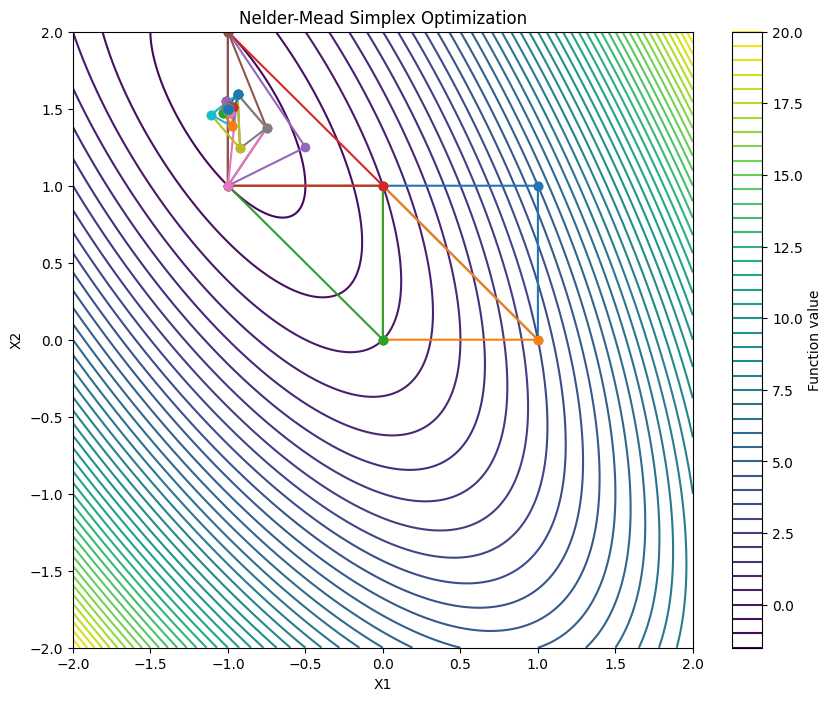

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def nelder_mead_simplex(func, initial_simplex, tol=1e-6, α=1, γ=2, ρ=0.5, max_iter=50):
    n = len(initial_simplex[0])  # Dimensionality of the problem
    simplex = np.array(initial_simplex)
    history = [np.copy(simplex)]  # Store initial simplex

    for iteration in range(max_iter):
        # Evaluate function values at the simplex points
        f_values = np.array([func(val) for val in simplex])

        # Identify the worst (XH), best (XL), and second-worst points
        worst_idx = np.argmax(f_values)
        best_idx = np.argmin(f_values)
        second_worst_idx = np.argsort(f_values)[-2]

        XH = simplex[worst_idx]  # Worst point (highest function value)
        XL = simplex[best_idx]   # Best point (lowest function value)
        X0 = np.mean([x for i, x in enumerate(simplex) if i != worst_idx], axis=0)  # Centroid

        # Reflection
        XR = X0 + α * (X0 - XH)
        fR = func(XR)

        if func(XL) <= fR < f_values[second_worst_idx]:
            simplex[worst_idx] = XR
            history.append(np.copy(simplex))
            continue
        
        # Expansion
        if fR < func(XL):
            XE = X0 + γ * (XR - X0)
            if func(XE) < fR:
                simplex[worst_idx] = XE
            else:
                simplex[worst_idx] = XR
            history.append(np.copy(simplex))
            continue
        
        # Contraction step
        if fR >= max(f_values[np.arange(len(f_values)) != worst_idx]):
            if fR < func(XH):
                simplex[worst_idx] = XR
                XC = X0 + ρ * (XH - X0)
            else:
                XC = X0 + ρ * (XH - X0)  # Contract toward centroid
            if func(XC) < min(func(XH), fR):
                simplex[worst_idx] = XC
            else:
                simplex = (simplex + XL) / 2  # Shrink the simplex
            history.append(np.copy(simplex))
            continue
        
        # Check for convergence
        f_values = np.array([func(x) for x in simplex])
        if np.sqrt(np.sum((f_values - np.mean(f_values))**2)) < tol:
            print(f"Converged after {iteration+1} iterations.")
            break

    best_point = simplex[np.argmin([func(x) for x in simplex])]
    return best_point, history

def plot_simplex_history(func, initial_simplex, history):
    # Define the grid for the contour plot
    x = np.linspace(-2, 2, 400)
    y = np.linspace(-2, 2, 400)
    X, Y = np.meshgrid(x, y)
    Z = func(np.array([X, Y]))
    # Plot the contour of the objective function
    plt.figure(figsize=(10, 8))
    plt.contour(X, Y, Z, levels=50, cmap='viridis')
    plt.colorbar(label='Function value')
    plt.title('Nelder-Mead Simplex Optimization')
    plt.xlabel('X1')
    plt.ylabel('X2')

    
    # 
    # Plot the simplex history
    # for idx, simp in enumerate(history):
    #     plt.plot(simp,[for simp in simplex], 'o-', label=f'Iteration {idx}')
    # Plot the simplex history
    for idx, simp in enumerate(history):
        # Ensure that simplex is a 2D array and has at least 3 points
        if simp.shape[0] >= 3:
            # Repeat the first point to close the polygon
            simp = np.vstack([simp, simp[0]])
            plt.plot(simp[:, 0], simp[:, 1], 'o-')#, label=f'Iteration {idx}')

    plt.show()  
    

# Example usage
def objective_function(X):
    return (X[0] - X[1] + 2*X[0]**2 + 2*X[1]*X[0] + X[1]**2)  # Simple quadratic function

initial_simplex = [[1.0, 1.0], [1.0, 0.0], [0.0, 1.0]]  # Initial triangle in 2D
best_point, history = nelder_mead_simplex(objective_function, initial_simplex)

print(f"Optimal point: {best_point}")

# Plotting the history of simplex points
plot_simplex_history(objective_function, initial_simplex, history)
